# Matrikel-Nr: 2235021

# **Dimesion Recuction On The Perms SF Data Set With PCA And Weekday Prediction** 

## **Imports**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


## **Load Data**

In [18]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()

    # prprocess the data
    """
        for row in sample.strip()[1:-1].split(';') - remove [] and split at ; 
        list(map(float, row.strip().split())) - For each row d in step before, splits row into individual elements. It then maps each element as a float using the float()
    """
    processed_data = [
        np.array([
            list(map(float, row.strip().split())) for row in sample.strip()[1:-1].split(';')
        ]) for sample in data
    ]

    # flatten the matrix in preprocessed data to fit into pca modell
    processed_data = np.array([matrix.flatten() for matrix in processed_data])

    return processed_data

def load_labels(file_path):
    with open(file_path, 'r') as file:
        labels = file.readlines()

    labels = np.array([int(val) for line in labels for val in line.strip()[1:-1].split() if val.isdigit()])
    return labels

# Beispielaufruf der Funktionen mit Reshape
train_data_file = 'pems+sf/PEMS_train'
test_data_file = 'pems+sf/PEMS_test'
train_labels_file = 'pems+sf/PEMS_trainlabels'
test_labels_file = 'pems+sf/PEMS_testlabels'

train_data = load_data(train_data_file)
test_data = load_data(test_data_file)
train_labels = load_labels(train_labels_file)
test_labels = load_labels(test_labels_file)

print(f"Train Data Shape: {train_data.shape} samples")
print(f"Test Data Shape: {test_data.shape} samples")

Train Data Shape: (267, 138672) samples
Test Data Shape: (173, 138672) samples


## **Exploreation**

- Each matrix describes the different occupancies rates (963 lines, one for each station/detector) sampled every 10 minutes during the day (144 columns)
- 963 sensors with 144 values = 138672 columns

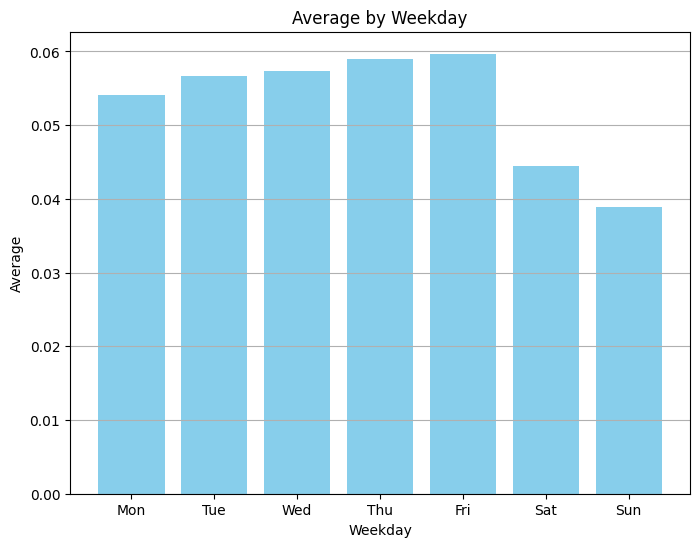

In [59]:
df = pd.DataFrame(train_data)
df['Average'] = df.mean(axis=1)
df['Weekday'] = train_labels
df['Weekday'] = df['Weekday'].apply(lambda x: 7 if x == 1 else x - 1)

weekday_average = df.groupby('Weekday').mean()
weekday_average["Average"]

plt.figure(figsize=(8, 6))
plt.bar(weekday_average.index, weekday_average['Average'], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Average')
plt.title('Average by Weekday')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  
plt.grid(axis='y') 
plt.show()

## **PCA**

In [19]:
# number of components in pca
n_components = 25

# fit pca - train and test data with same pca (fit_transform() -> transform())
pca = PCA(n_components=n_components)

train_data_pca = pca.fit_transform(train_data)
test_data_pca = pca.transform(test_data)

# dimensions after transform
print(f"Train Data Shape after PCA: {train_data_pca.shape}")
print(f"Test Data Shape after PCA: {test_data_pca.shape}")

Train Data Shape after PCA: (267, 25)
Test Data Shape after PCA: (173, 25)


## **Log. Regression**

In [20]:
logreg = LogisticRegression(max_iter=1000)

logreg.fit(train_data_pca, train_labels)


pred_logreg = logreg.predict(test_data_pca)

classification_rep = classification_report(test_labels, pred_logreg)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       0.86      0.76      0.81        25
           3       0.67      0.77      0.71        26
           4       0.57      0.52      0.55        23
           5       0.82      0.82      0.82        22
           6       0.89      0.93      0.91        27
           7       1.00      1.00      1.00        20

    accuracy                           0.83       173
   macro avg       0.83      0.83      0.83       173
weighted avg       0.83      0.83      0.83       173

